In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


**Author: Max Sharplin
id: 1317451**

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('../input/wisconsin_breast_cancer.csv')
data = data.fillna(0)
data.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id           699 non-null int64
thickness    699 non-null int64
size         699 non-null int64
shape        699 non-null int64
adhesion     699 non-null int64
single       699 non-null int64
nuclei       699 non-null float64
chromatin    699 non-null int64
nucleoli     699 non-null int64
mitosis      699 non-null int64
class        699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


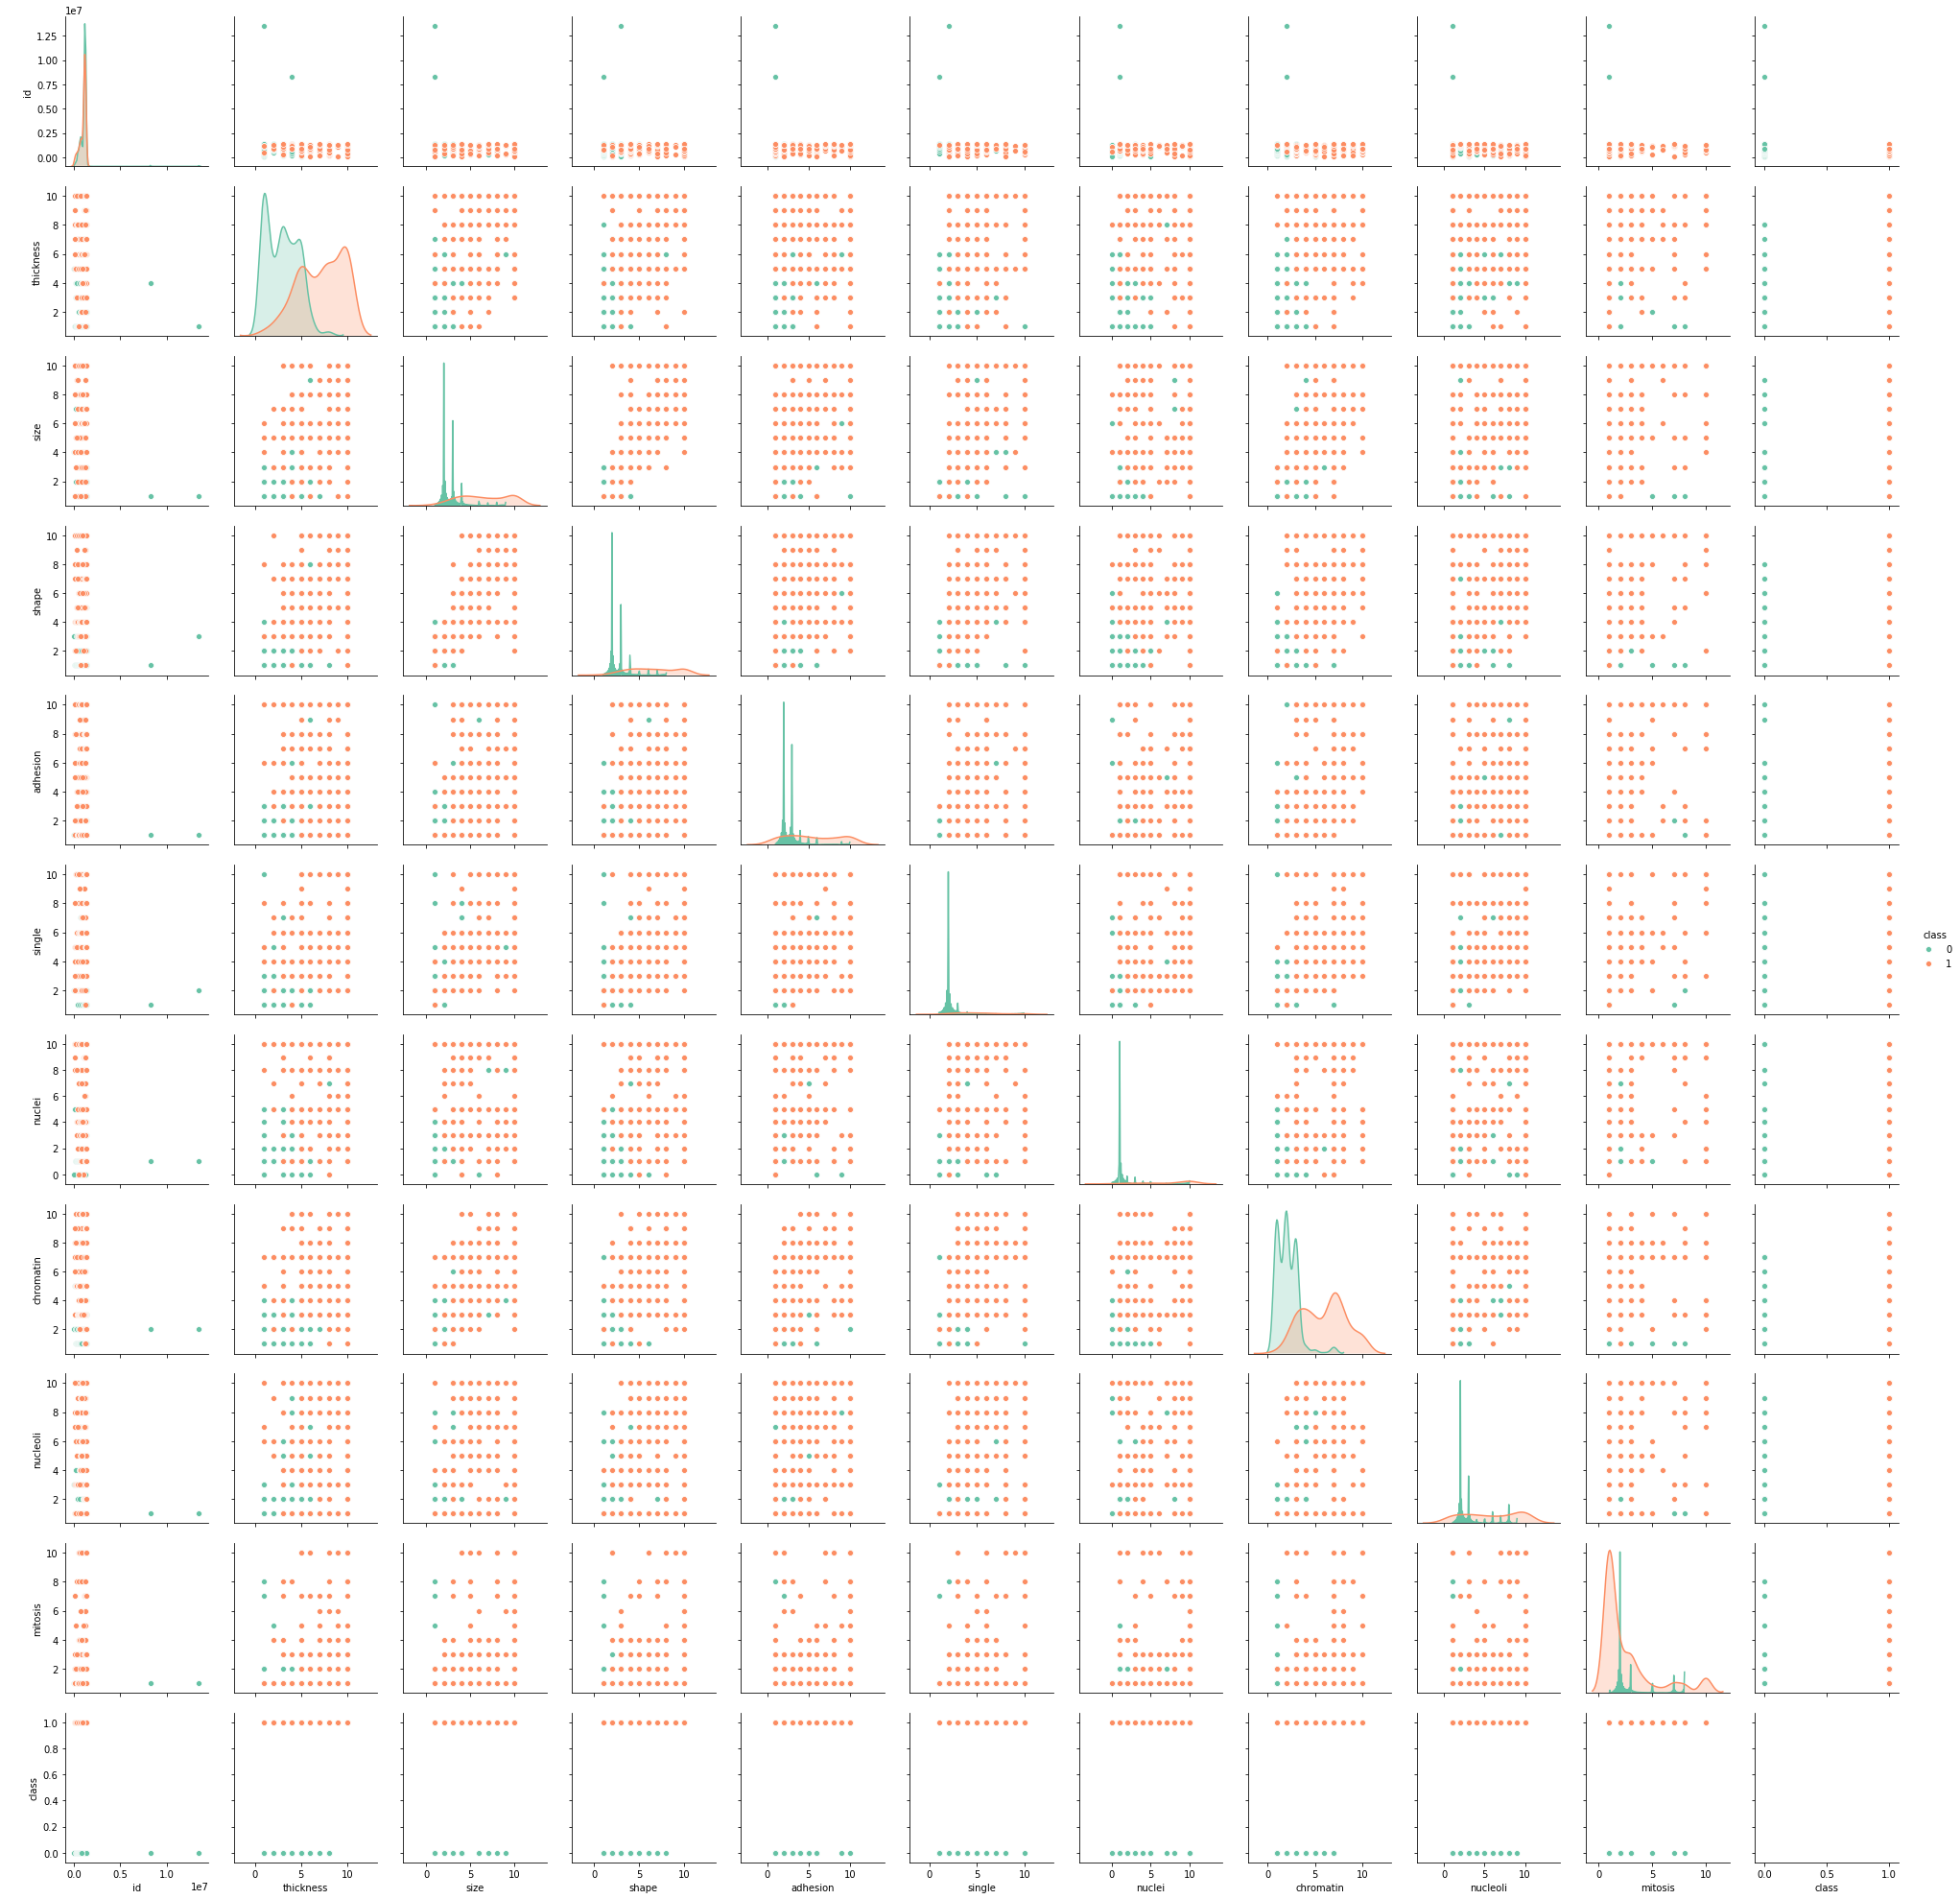

In [7]:
import seaborn as sns
sns.pairplot(data, hue = 'class', palette = 'Set2')

Most of the pairplots are very difficult to interpret as they form rectangular blocks. I assume this is because all variables are integers (except nuclei) and can only take specific values betwen 1 and 10 (except for class and id). As a result, there are only a certain number of possible combinations two variables can take, resulting in the rectangular block shape of the pairplots.  It is very difficult to spot relationships between variables and so the only thing to look for is grouping based on class (denoted by the colours).  There does appear to be some grouping by class in a number of the pairplots while others appear to be more randomly spread out in this sense.

In [17]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, 1:10]
y = data.iloc[:, 10]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape, y_train.shape)

(559, 9) (559,)


In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
pred = model.predict(x_test)
print(pred[:5])
print(y_test[:5])

[0 1 1 1 0]
114    0
357    1
201    1
487    1
614    0
Name: class, dtype: int64


The first 5 predictions are all correct which is a good early sign that the model may be a good one.

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))

[[85  6]
 [ 1 48]]


There were only 7 incorrect predictions which indicates the model works fairly well.

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        91
           1       0.89      0.98      0.93        49

   micro avg       0.95      0.95      0.95       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.95      0.95      0.95       140



The values for precision and recall are all quite high which further suggests this model works fairly well.

After 'eyeballing' the vizualisation, I have decided to use thickness, shape, chromatin, and nuclei as my four features of the new xsub. This is because the plots for these appeared to be somewhat split into groups based on class.

In [30]:
xsub_train = x_train.iloc[:, [0,2,5,6]]
xsub_test = x_test.iloc[:, [0,2,5,6]]
sub_model = SVC()
sub_model.fit(xsub_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
sub_pred = sub_model.predict(xsub_test)
print(sub_pred[:5])
print(y_test[:5])

[0 1 1 1 0]
114    0
357    1
201    1
487    1
614    0
Name: class, dtype: int64


Once again, the first 5 predictions were all correct which is a good sign.

In [33]:
print(confusion_matrix(y_test, sub_pred))

[[84  7]
 [ 2 47]]


This model made 9 incorrect predictions which is more than the earlier model but still not too bad.

In [34]:
print(classification_report(y_test, sub_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        91
           1       0.87      0.96      0.91        49

   micro avg       0.94      0.94      0.94       140
   macro avg       0.92      0.94      0.93       140
weighted avg       0.94      0.94      0.94       140



Once again, the precision and markdown values are quite high which further suggests the model works fairly well.

The first approach made one more correct prediction for each class than the second approach.  This is not a big enough difference for me to confidently say that one approach was better than the other even though the first was slightly better for this particular test set (it may not be for other sets of data).

In [35]:
from sklearn.neighbors import KNeighborsClassifier
k1model = KNeighborsClassifier(n_neighbors=1)
k1model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [36]:
k1pred = k1model.predict(x_test)
print(k1pred[:5])
print(y_test[:5])

[0 1 1 1 0]
114    0
357    1
201    1
487    1
614    0
Name: class, dtype: int64


The first 5 predictions were all correct, as was the case for the first two models.

In [37]:
print(confusion_matrix(y_test, k1pred))

[[87  4]
 [ 3 46]]


This model made 7 incorrect predictions which is good considering there are 140 total pieces of data in the test set.

In [38]:
print(classification_report(y_test, k1pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.92      0.94      0.93        49

   micro avg       0.95      0.95      0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



The precision and recall values are all high, further showing this is a good model

In [39]:
k5model = KNeighborsClassifier(n_neighbors=5)
k5model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
k5pred = k5model.predict(x_test)
print(k5pred[:5])
print(y_test[:5])

[0 1 1 1 0]
114    0
357    1
201    1
487    1
614    0
Name: class, dtype: int64


All of the first 5 predictions were correct again.

In [41]:
print(confusion_matrix(y_test, k5pred))

[[88  3]
 [ 1 48]]


This model only made 4 incorrect predictions which is very good considering the size of the test set (140).

In [43]:
print(classification_report(y_test, k5pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        91
           1       0.94      0.98      0.96        49

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



As stated earlier, neither SVC (all features or the subset) was better than the other due to their predictions being so similar (although the full model was slightly better for this particular test set).  The kNN classifier with k=1 produced 7 wrong predictions (the same as the full SVC model) so we cannot say it is better overall than either of the SVC models.  The kNN classifier with k=5 only made 4 incorrect predictions which is much better than any of the other models.  This can be further seen by the fact that its precision an recall both have weighted averages of 0.97 (compared to 0.95 for k=1 and full SVC, 0.94 for subset SVC).  Therefore I would say that the kNN classifier with k=5 was the best approach (although all the approaches were reasonably accurate).